In this notebook, a clustering method was used to segment AZ Watch subscribers based on their numerical data. This analysis, including rounding the average values for each cluster to the nearest whole number, was conducted to establish more personalized and targeted campaigns aimed at reducing subscriber churn.


## 0. Libraries

In [2]:
# Import the necessary modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt


## 1. Datasets

In [3]:
# path
file_path = "data/AZWatch_subscribers.csv"

# read data
df = pd.read_csv(file_path)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subscriber_id         1000 non-null   int64  
 1   age_group             1000 non-null   object 
 2   engagement_time       1000 non-null   float64
 3   engagement_frequency  1000 non-null   int64  
 4   subscription_status   1000 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


## 2. Splitting Data

 Separate the features and labels, then split the data into training and test sets to prepare for model training.

In [4]:
# predictor vs target
X = df.drop(['subscriber_id','subscription_status'], axis=1)
y = df.subscription_status

# 20% train test split
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=.2, random_state=42)


## 3. Data Processing

Apply one-hot encoding to categorical variables in the training and test sets for model compatibility.

In [5]:
# One Hot Encode numericals
#  age_group train df 
X_train_prepared = pd.get_dummies(X_train, columns=['age_group'])

# test df
X_test_prepared = pd.get_dummies(X_test, columns=['age_group'])


## 4. Logistic Regression
Train a logistic regression model on the processed data to predict subscription status.

In [6]:

# LOGISTIC REGRESSION CLASSIFIER
# Train a logistic regression classifier for subscriber churn prediction
model1 = LogisticRegression()
model1.fit(X_train_prepared, y_train)

# logreg accuracy score for test df
score = model1.score(X_test_prepared, y_test)
print("\nLogistic regression accuracy score: ", score)



Logistic regression accuracy score:  0.925


## 5. Decision Tree
Train a decision tree classifier on the processed data to predict subscription status and evaluate its performance.

In [7]:

# DECISION TREE CLASSIFIER
# Train a decision tree classifier for subscriber churn prediction
model2 = DecisionTreeClassifier(max_depth=3, criterion="gini")
model2.fit(X_train_prepared, y_train)

# decision tree's accuracy score for test df
score = model2.score(X_test_prepared, y_test)
print("\nDecision tree accuracy score: ", score)



Decision tree accuracy score:  0.92


## 6. Random Forest
Train a random forest classifier on the processed data to predict subscription status and evaluate its performance.

In [8]:
model3 = RandomForestClassifier(n_estimators = 10, max_depth=3)
model3.fit(X_train_prepared, y_train)

#  ensemble's accuracy score for test df
score = model3.score(X_test_prepared, y_test)
print("\nRandom Forest accuracy score: ", score)




Random Forest accuracy score:  0.92


## 7.  Elbow Method for # of Clusters
Apply K-Means clustering to segment subscribers and analyze the average values for each cluster to identify distinct subscriber groups.

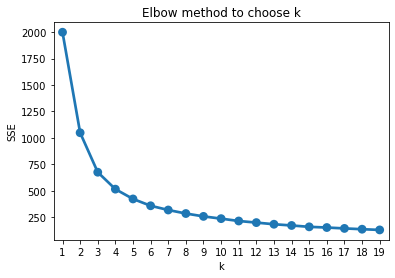

In [9]:
segmentation = X.drop(['age_group'], axis=1)

# scaling the numerical features
scaler = StandardScaler()
scaler.fit(segmentation)
segmentation_normalized = scaler.transform(segmentation)

sse = {} # sum of squared errors = distances) between the clusters
for k in range(1,20):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(segmentation_normalized)
    sse[k] = kmeans.inertia_ 
    
plt.title('Elbow method for k')
plt.xlabel('k');plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()



## 8. Subscriber Segmentation
The elbow method suggests using 3 clusters for segmenting AZ Watch subscribers.

In [10]:
# k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit_predict(segmentation_normalized)

# cluster labels as a new attribute pre-scaling
segmentation["cluster_id"] = kmeans.labels_

# average feature values and counts per cluster
analysis = segmentation.groupby(['cluster_id']).agg({
    'engagement_time': ['mean'],
    'engagement_frequency':['mean']
}).round(0)
analysis

,engagement_time,engagement_frequency
,mean,mean
cluster_id,,
0,7.0,18.0
1,4.0,5.0
2,9.0,9.0


Cluster 0 has moderate engagement time (7.0) and high engagement frequency (18.0). Cluster 1 shows the lowest engagement time (4.0) and frequency (5.0). Cluster 2 has the highest engagement time (9.0) and moderate engagement frequency (9.0), providing insights for targeted campaign strategies to reduce subscriber churn.